<a href="https://colab.research.google.com/github/Amirbn73/Water-Potability/blob/main/Water_Quality_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**

---
**Project Overview: Water Potability Prediction**

**Background:**

Access to clean and safe drinking water is a fundamental human right and a critical factor in maintaining public health. Yet, across the globe, concerns about water quality persist. Contaminated water sources can lead to a host of health issues, making the assessment of water potability of utmost importance.

**Objective:**

This project revolves around the pivotal objective of predicting the potability of water samples. Through the analysis of various water quality parameters, we aim to develop a robust predictive model capable of distinguishing between potable and non-potable water samples. This endeavor directly contributes to safeguarding public health by enabling timely and accurate assessments of water safety.

**Dataset:**

Our dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/adityakadiwal/water-potability), comprises a rich array of features encompassing critical water quality indicators. These indicators include pH levels, hardness, solids content, chloramine concentration, sulfate levels, conductivity, organic carbon content, trihalomethane concentration, turbidity, and, most importantly, the target variable "Potability," indicating whether a given water sample is safe for consumption (1) or not (0).

**Approach:**

Our project unfolds in several key phases. We initiate with data preprocessing to ensure data cleanliness and handle missing values. Subsequently, we delve into exploratory data analysis (EDA) to gain insights into the dataset's characteristics and relationships between variables. Armed with these insights, we proceed to construct predictive models that can accurately classify water samples as potable or not.

**Expected Outcomes:**

By the conclusion of this project, readers will gain a comprehensive understanding of the factors that influence water potability. They will witness the application of machine learning and data analysis techniques to tackle real-world challenges in public health and environmental monitoring. Furthermore, the project will deliver a reliable predictive model that can assist in assessing the safety of water sources swiftly and effectively.

In summary, this project embodies our commitment to leveraging data-driven insights for the betterment of society, with a specific focus on ensuring access to clean and potable water—an essential cornerstone of public health and well-being.


In this project, I have run some EDA and also predictive modelling to see if a water body is potable or not?

You can download the dataset from this address:

https://www.kaggle.com/datasets/adityakadiwal/water-potability

In [3]:
!pip install optuna
!pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.2/404.2 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.8 MB/s eta 0:00:00


# **Importing Libraries and Data**

In [4]:
from google.colab import files
import pandas as pd

#libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns

#importing libraries for imputing missing values
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV, RandomizedSearchCV
import optuna
from skopt import BayesSearchCV
from hyperopt import fmin, tpe, hp
from xgboost import XGBClassifier
from scipy import stats

In [5]:
file = files.upload()

Saving water_potability.csv to water_potability.csv


In [6]:
data = pd.read_csv('water_potability.csv')

# **Initial Data Exploration**

In [7]:
sum(data.duplicated())

0

There is no duplicate values in this dataset

In [8]:
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


We have seen several NaN values and different scales of the features.

In [9]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


So, all the features' amounts are float except the target feature which is potablity which is categorical data with amounts 1 and 0. In regard to some features, there are some null values in dataset. This includes PH, Sulfate, Trihalomethanes.

In [123]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


**Here are some insights from the provided data exploration:**

pH: The pH values range from 0 to 14, with an average of approximately 7.08. Most values fall within the pH range recommended by WHO (6.5 to 8.5).

Hardness: The water's hardness varies with an average of around 196.37. Hardness is mainly due to calcium and magnesium salts, and this dataset contains values within a typical range.

Solids (TDS): Total dissolved solids (TDS) values range from around 320 to 61,227, with an average of roughly 22,014. Higher TDS values suggest more mineralized water.

Chloramines: Chloramines levels are varied, averaging about 7.12. Concentrations of up to 4 mg/L are considered safe in drinking water.

Sulfate: Sulfate concentrations range from 129 to 481.03 mg/L. Sulfate levels are generally lower than seawater, which has a concentration of about 2,700 mg/L.

Conductivity: Electrical conductivity (EC) values range from 181.48 to 753.34 μS/cm. WHO recommends an EC value below 400 μS/cm.

Organic Carbon: Organic carbon levels range from 2.2 to 28.3 mg/L. Lower levels are desirable in drinking water.

Trihalomethanes (THMs): THM concentrations vary with an average of approximately 66.4. THMs are byproducts of chlorine treatment and are within acceptable limits.

Turbidity: Turbidity values range from 1.45 to 6.739 NTU. The mean turbidity is below the WHO recommended value of 5.00 NTU.

Potability: The dataset indicates whether water is safe for consumption (1 for potable, 0 for not potable). About 39.01% of the data points are labeled as potable.

These insights provide a preliminary understanding of the water quality parameters and their ranges within the dataset. Further analysis and modeling can help extract more meaningful patterns and relationships.

In [11]:
print(data["Potability"].value_counts())

0    1998
1    1278
Name: Potability, dtype: int64


**In this data set, 1998 of them are not potable and 1278 of water samples are potable.**


---

This distribution suggests that the dataset is slightly imbalanced, with more instances of not potable water compared to potable water. This is an important aspect to consider when building predictive models or conducting further analysis on the data.

In [12]:
data['Potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

Almost %61 of the instances of our target variable is 'Potable'
%39 of the instances of our target variable is 'Not Potable'

**Skewness**

In [13]:
data.drop('Potability', axis=1).skew()

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

**Univariate Analysis**

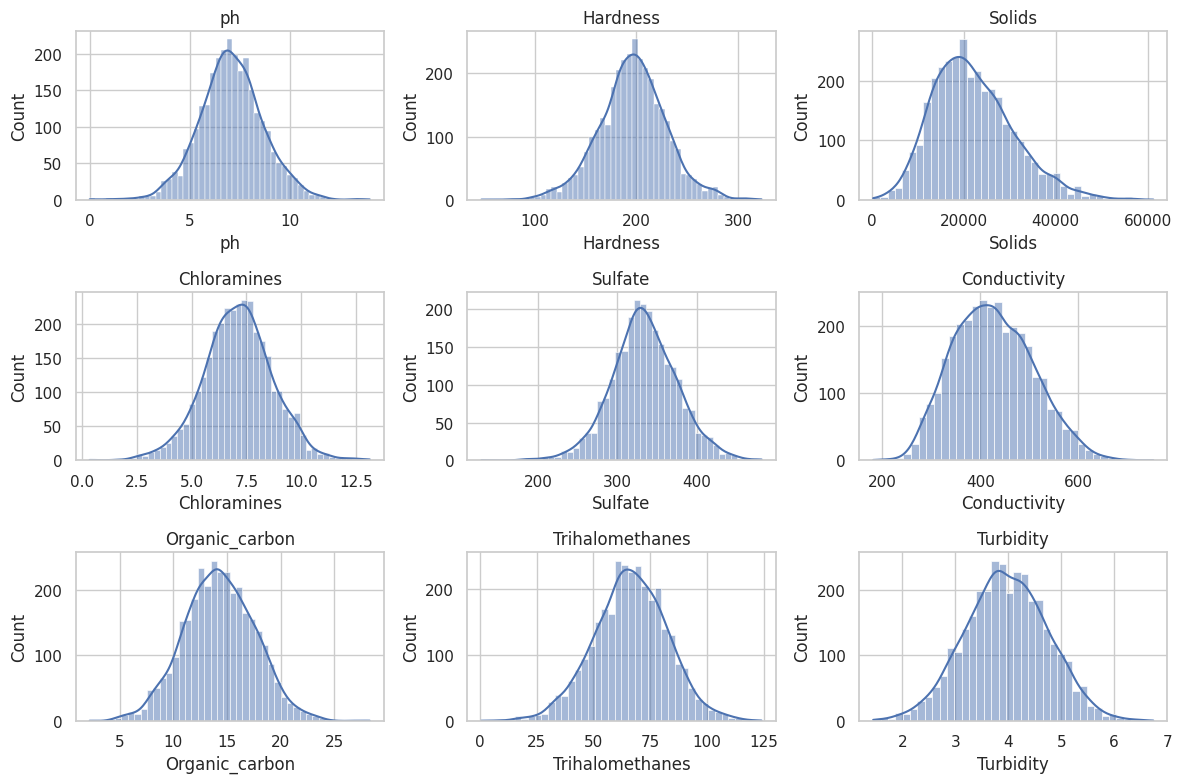

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

numerical_columns = data.drop("Potability", axis=1).columns

for column in numerical_columns:
    plt.subplot(3, 3, numerical_columns.get_loc(column) + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

Upon analyzing the histograms of various water quality metrics, it is evident that the dataset exhibits normal distribution patterns for multiple parameters. The pH values, hardness levels, total dissolved solids (TDS), chloramines concentration, sulfate levels, organic carbon content, trihalomethanes concentration, and turbidity values all follow approximately normal distribution curves. This observation provides valuable insights into the natural variations of these water quality parameters across the dataset. Such distributions indicate that the dataset is diverse and encompasses a broad range of water quality conditions, mirroring real-world variations in water sources. These findings enhance the dataset's credibility and its potential to support robust analyses and modeling efforts.

**Solids** have slightly right skewness.

**Bivariate Analysis**

In [15]:
import plotly.graph_objs as go
index_vals = data['Potability'].astype('category').cat.codes

fig = go.Figure(data=go.Splom(
                dimensions=[dict(label='ph',
                                 values=data['ph']),
                            dict(label='Hardness',
                                 values=data['Hardness']),
                            dict(label='Solids',
                                 values=data['Solids']),
                            dict(label='Chloramines',
                                 values=data['Chloramines']),
                           dict(label='Sulfate',
                                 values=data['Sulfate']),
                            dict(label='Conductivity',
                                 values=data['Conductivity']),
                            dict(label='Organic_carbon',
                                 values=data['Organic_carbon']),
                            dict(label='Trihalomethanes',
                                 values=data['Trihalomethanes']),
                           dict(label='Turbidity',
                                 values=data['Turbidity'])],
                showupperhalf=False,
                text=data['Potability'],
                marker=dict(color=index_vals,
                            showscale=False,
                            line_color='white', line_width=0.5)
                ))


fig.update_layout(
    title='Water Quality',
    width=1000,
    height=1000,
)

fig.show()

In [16]:
fig = go.Figure(go.Heatmap(z=data.corr(), x=data.corr().columns.tolist(), y=data.corr().columns.tolist(), colorscale='agsunset'))
fig.show()

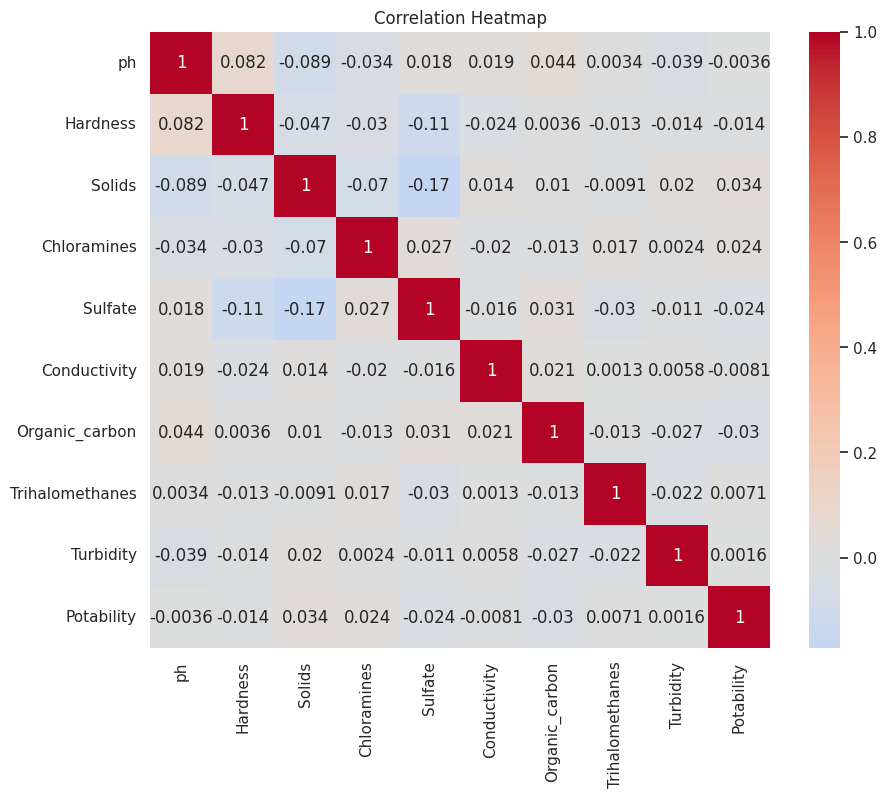

In [17]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

**Sulfate and Hardness:**

The correlation coefficient between Sulfate and Hardness is approximately -0.1069. This suggests a weak negative correlation between these two variables. While the correlation implies that higher Sulfate levels may be associated with lower Hardness levels, the correlation strength is relatively modest.

**Solids and Sulfate:**

There is a negative correlation of approximately -0.171 between Solids and Sulfate levels. This suggests that higher levels of Solids in the water are associated with lower levels of Sulfate. While the correlation coefficient indicates a moderate negative correlation, it's important to remember that correlation doesn't imply causation.

# **Handling Missing Values**

Visualizations and getting numeric summaries are the first step in understanding the missing information in a dataset.
Identify how many and what type of missing values are in our dataset is one of the first steps when dealing with missing values.

In [18]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

We have 3 features with the mssing values.

*   ph : 491
*   Sulfate : 781
*   Trihalomethanes : 162

Now let's see the percentage of missing values in each feature.

In [19]:
data.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

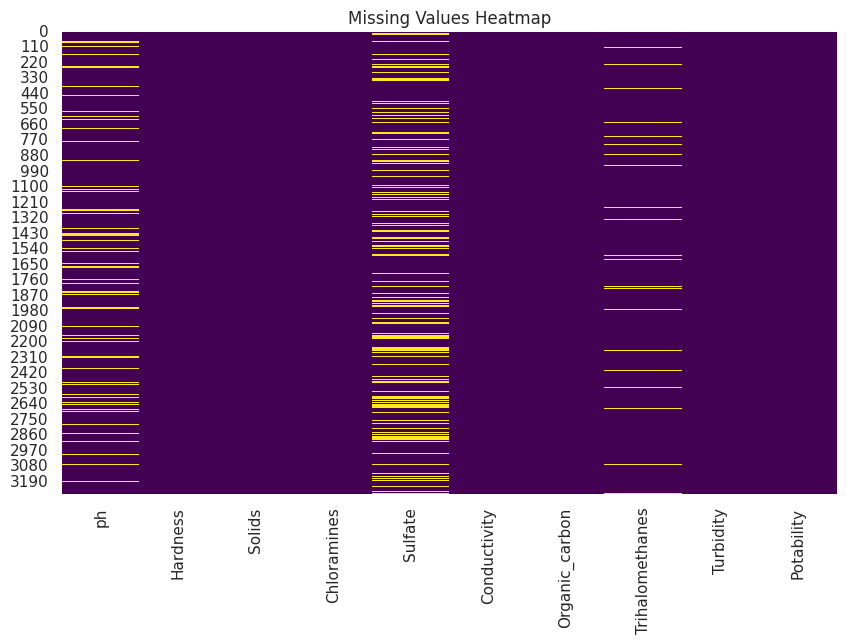

In [20]:
# Create a heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

In [21]:
data[data['ph'].isnull() & data['Sulfate'].isnull()].shape[0]

112

In [22]:
data[data['ph'].isnull() & data['Trihalomethanes'].isnull()].shape[0]

26

In [23]:
data[data['Sulfate'].isnull() & data['Trihalomethanes'].isnull()].shape[0]

40

In [24]:
data[data['Sulfate'].isnull() & data['Trihalomethanes'].isnull() & data['ph'].isnull()].shape[0]

9

# **Imputing missing values:**

https://www.mdpi.com/2071-1050/13/11/6318

### **Imputing ph values**

In [25]:
rfr_imputer = RandomForestRegressor(n_estimators=100, random_state=0)

In [26]:
df = data.copy().drop(['Potability',], axis = 1)

To do this other two features with nan values should be deleted

In [27]:
df = df.drop(['Sulfate', 'Trihalomethanes',], axis = 1)

In [28]:
df.shape

(3276, 7)

In [29]:
df_x= df.dropna().drop(['ph'],axis = 1)

In [30]:
df_x.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075
5,188.313324,28748.687739,7.544869,280.467916,8.399735,2.559708


In [31]:
df_y = df['ph'].dropna()

In [32]:
df_x.shape, df_y.shape

((2785, 6), (2785,))

In [33]:
rfr_imputer.fit(df_x, df_y)

RandomForestRegressor(random_state=0)

In [34]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

In [35]:
null_rows = pd.DataFrame(null_rows)

In [36]:
null_rows.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity
0,NaN,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135
8,NaN,118.988579,14285.583854,7.804174,389.375566,12.706049,3.595017
13,NaN,150.174923,27331.361962,6.838223,379.761835,19.370807,4.413974
20,NaN,227.435048,22305.567414,10.333918,554.820086,16.331693,4.133423
22,NaN,215.977859,17107.224226,5.607060,436.256194,14.189062,5.459251


In [37]:
X_unknown = null_rows.drop('ph', axis = 1).copy()

In [38]:
imputed_values = rfr_imputer.predict(X_unknown)

In [39]:
imputed_values

array([7.28364266, 6.29597597, 6.72954713, 7.59549829, 7.2822424 ,
       6.27101671, 7.1703194 , 6.43073019, 6.511302  , 6.58920257,
       7.52736544, 7.35137779, 6.45744599, 6.70759723, 6.8033027 ,
       6.99639136, 8.03061463, 7.23852967, 7.74531439, 6.98969007,
       7.39899922, 8.21221048, 7.64476306, 6.38883037, 6.94258769,
       6.66653183, 6.03193361, 6.50487843, 7.18346116, 7.83905779,
       7.38425782, 7.61762753, 7.44006965, 7.64009472, 6.92698254,
       6.95138784, 7.47313099, 6.99458484, 7.43411446, 7.3097015 ,
       6.94408225, 7.54381165, 6.25133253, 7.49008001, 6.96993741,
       6.80518522, 6.80738373, 6.5179117 , 7.22473433, 6.07304712,
       6.79645631, 5.97409332, 7.14384891, 7.8251682 , 6.93840225,
       7.41003768, 6.30201621, 6.5719383 , 6.98298258, 7.45837941,
       6.38279803, 6.80903023, 7.43960406, 6.79678148, 7.01999194,
       7.37430683, 7.06571373, 6.61774118, 7.0482028 , 7.39096184,
       7.01323877, 6.57766841, 7.40448796, 7.0163971 , 7.61831

In [40]:
null_rows.ph = imputed_values

In [41]:
null_rows

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity
0,7.283643,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135
8,6.295976,118.988579,14285.583854,7.804174,389.375566,12.706049,3.595017
13,6.729547,150.174923,27331.361962,6.838223,379.761835,19.370807,4.413974
20,7.595498,227.435048,22305.567414,10.333918,554.820086,16.331693,4.133423
22,7.282242,215.977859,17107.224226,5.607060,436.256194,14.189062,5.459251
...,...,...,...,...,...,...,...
3224,7.214580,198.218700,31081.735264,7.419106,517.925946,11.711419,3.345543
3229,7.729217,203.204659,10643.186771,6.828936,384.597711,16.011328,3.065910
3231,7.286950,225.754109,28194.452646,5.892830,418.272901,17.306832,3.855895
3245,6.942923,188.536608,24711.414927,7.129520,555.548534,16.959269,4.331691


In [42]:
imputed_data = data.copy()

In [43]:
imputed_data['ph'].fillna(null_rows['ph'], inplace=True)

In [44]:
imputed_data['ph'].isnull().sum()

0

### **Imputing Sulfate values**

In [45]:
rfr_imputer = RandomForestRegressor(n_estimators=100, random_state=0)

In [46]:
df = imputed_data.copy().drop(['Potability',], axis = 1)

Now that null values in ph column are imputed we can use it for imputing other columns, so just "Trihalomethanes" column needs to be deleted due to it's null values

In [47]:
df = df.drop(['Trihalomethanes',], axis = 1)

In [48]:
df.shape

(3276, 8)

In [49]:
df_x= df.dropna().drop(['Sulfate'],axis = 1)

In [50]:
df_x.head()

,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity
0,7.283643,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135
3,8.316766,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771
4,9.092223,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075
5,5.584087,188.313324,28748.687739,7.544869,280.467916,8.399735,2.559708
6,10.223862,248.071735,28749.716544,7.513408,283.651634,13.789695,2.672989


In [51]:
df_y = df['Sulfate'].dropna()

In [52]:
df_x.shape, df_y.shape

((2495, 7), (2495,))

In [53]:
rfr_imputer.fit(df_x, df_y)

RandomForestRegressor(random_state=0)

In [54]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

In [55]:
null_rows = pd.DataFrame(null_rows)

In [56]:
null_rows.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,3.055934
11,7.974522,218.693300,18767.656682,8.110385,NaN,364.098230,14.525746,4.011718
14,7.496232,205.344982,28388.004887,5.072558,NaN,444.645352,13.228311,4.777382
16,7.051786,211.049406,30980.600787,10.094796,NaN,315.141267,20.397022,4.268429


In [57]:
X_unknown = null_rows.drop('Sulfate', axis = 1).copy()

In [58]:
imputed_values = rfr_imputer.predict(X_unknown)

In [59]:
imputed_values

array([342.95716353, 315.81540303, 325.50585665, 314.76557507,
       329.56841782, 337.60615605, 316.65542868, 338.9787696 ,
       338.61954671, 333.74861595, 314.57990724, 344.46201109,
       334.30746352, 323.12437288, 348.8819426 , 350.14796197,
       325.94216035, 343.15115012, 315.70727735, 340.94646781,
       338.10491588, 323.21952969, 322.52572029, 343.28428495,
       354.12406384, 329.57570662, 333.189802  , 323.38802088,
       325.9686058 , 289.48838374, 345.84494278, 284.52202309,
       328.55186234, 350.25367439, 320.03724631, 334.94400585,
       366.1987462 , 335.81539309, 339.64415556, 320.56407828,
       333.09076086, 329.96736412, 346.28666669, 328.59827189,
       325.79613696, 323.50961512, 321.78823329, 338.65477616,
       345.2936757 , 367.07668688, 338.65579072, 342.62891094,
       336.21171618, 357.39253988, 328.27685511, 358.63679456,
       330.67700891, 332.41036173, 348.28519374, 353.50815324,
       333.32837361, 376.07887573, 333.62007505, 340.76

In [60]:
null_rows.Sulfate = imputed_values

In [61]:
null_rows

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity
1,3.716080,129.422921,18630.057858,6.635246,342.957164,592.885359,15.180013,4.500656
2,8.099124,224.236259,19909.541732,9.275884,315.815403,418.606213,16.868637,3.055934
11,7.974522,218.693300,18767.656682,8.110385,325.505857,364.098230,14.525746,4.011718
14,7.496232,205.344982,28388.004887,5.072558,314.765575,444.645352,13.228311,4.777382
16,7.051786,211.049406,30980.600787,10.094796,329.568418,315.141267,20.397022,4.268429
...,...,...,...,...,...,...,...,...
3266,8.372910,169.087052,14622.745494,7.547984,343.405869,464.525552,11.083027,4.906358
3272,7.808856,193.553212,17329.802160,8.061362,343.667812,392.449580,19.903225,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,326.813312,432.044783,11.039070,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,322.366165,402.883113,11.168946,4.708658


In [62]:
#filling na values with imputed values
imputed_data['Sulfate'].fillna(null_rows['Sulfate'], inplace=True)

In [63]:
imputed_data['Sulfate'].isnull().sum()

0

### **Imputing Trihalomethanes null values:**

In [64]:
rfr_imputer = RandomForestRegressor(n_estimators=100, random_state=0)

In [65]:
df = imputed_data.copy().drop(['Potability',], axis = 1)

In [66]:
df.shape

(3276, 9)

Now that all columns except 'Trihalomethanes' are without any null values we can use all dataset to impute null values in this column.

In [67]:
df_x= df.dropna().drop(['Trihalomethanes'],axis = 1)

In [68]:
df_x.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity
0,7.283643,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,2.963135
1,3.716080,129.422921,18630.057858,6.635246,342.957164,592.885359,15.180013,4.500656
2,8.099124,224.236259,19909.541732,9.275884,315.815403,418.606213,16.868637,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,4.075075


In [69]:
df_y = df['Trihalomethanes'].dropna()

In [70]:
df_x.shape, df_y.shape

((3114, 8), (3114,))

In [71]:
rfr_imputer.fit(df_x, df_y)

RandomForestRegressor(random_state=0)

In [72]:
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]

In [73]:
null_rows = pd.DataFrame(null_rows)

In [74]:
null_rows.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
62,6.996391,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,NaN,3.855602
81,5.519126,168.728583,12531.601921,7.730723,343.284285,443.570372,18.099078,NaN,3.758996
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,NaN,5.239982
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,NaN,3.149158
119,7.812804,196.583886,42550.841816,7.334648,289.488384,442.545775,14.666917,NaN,6.204846


In [75]:
X_unknown = null_rows.drop('Trihalomethanes', axis = 1).copy()

In [76]:
imputed_values = rfr_imputer.predict(X_unknown)

In [77]:
null_rows.Trihalomethanes = imputed_values

In [78]:
null_rows

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
62,6.996391,229.485694,35729.692709,8.810843,384.943779,296.397547,16.927092,61.852476,3.855602
81,5.519126,168.728583,12531.601921,7.730723,343.284285,443.570372,18.099078,68.506580,3.758996
110,9.286155,222.661551,12311.268366,7.289866,332.239359,353.740100,14.171763,70.476624,5.239982
118,7.397413,122.541040,8855.114121,6.888689,241.607532,489.851600,13.365906,66.048812,3.149158
119,7.812804,196.583886,42550.841816,7.334648,289.488384,442.545775,14.666917,69.907610,6.204846
...,...,...,...,...,...,...,...,...,...
3174,6.698154,198.286268,34675.862845,6.263602,360.232834,430.935009,12.176678,62.542191,3.758180
3185,6.110022,234.800957,16663.539074,5.984536,348.055211,437.892115,10.059523,69.541235,2.817780
3219,6.417716,209.702425,31974.481631,7.263425,321.382124,289.450118,11.369071,65.008913,4.210327
3259,9.271355,181.259617,16540.979048,7.022499,309.238865,487.692788,13.228441,65.079137,4.333953


In [79]:
imputed_data['Trihalomethanes'].fillna(null_rows['Trihalomethanes'], inplace=True)

In [80]:
imputed_data['Trihalomethanes'].isnull().sum()

0

In [81]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Now we can go further with a data with no missing value.

**Outliers exploration:**

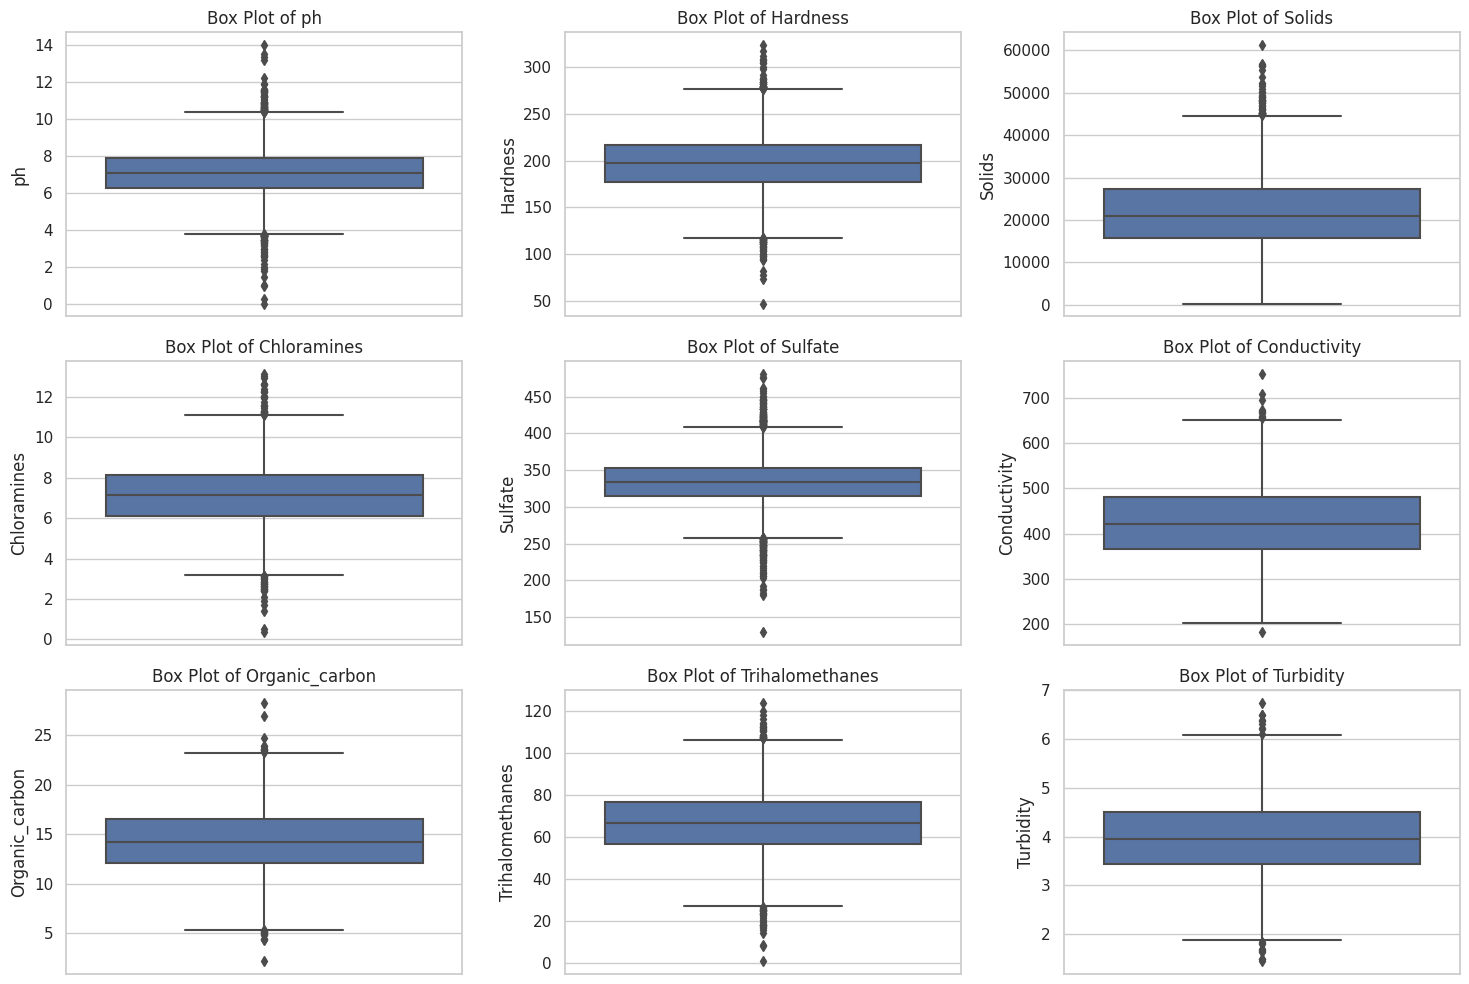

In [82]:
# List of numerical features

numerical_features = [feature for feature in imputed_data.drop('Potability', axis = 1).columns if imputed_data[feature].dtype != 'object']

# Determine the number of subplots and rows
num_plots = len(numerical_features)
num_rows = 3
num_cols = 3

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
axes = axes.ravel()

# Loop through each numerical feature and create a box plot
for i, feature in enumerate(numerical_features):
    sns.boxplot(data= imputed_data, y=feature, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [83]:
# Define a function to count outliers using IQR method
def count_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

In [84]:
# Create a DataFrame to store the number of outliers for each feature
outliers_df = pd.DataFrame(columns=['Number of Outliers'])

# Count outliers for each feature and store the results in the DataFrame
for feature in data.drop('Potability', axis = 1).columns:
    if data[feature].dtype != 'object':
        num_outliers = count_outliers(data[feature])
        outliers_df.loc[feature]= num_outliers

# Sort the DataFrame by number of outliers in descending order
outliers_df = outliers_df.sort_values(by='Number of Outliers', ascending=False)

outliers_df

,Number of Outliers
Hardness,83
Chloramines,61
Solids,47
ph,46
Sulfate,41
Trihalomethanes,33
Organic_carbon,25
Turbidity,19
Conductivity,11


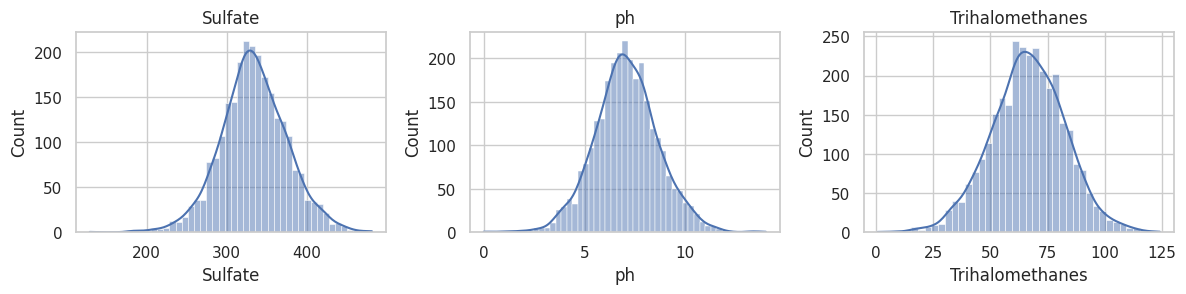

In [85]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

numerical_columns = data[['Sulfate', 'ph', 'Trihalomethanes']].columns

for column in numerical_columns:
    plt.subplot(3, 3, numerical_columns.get_loc(column) + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# **Feature Engineering:**

let's dive into creating domain knowledge features based on the water quality dataset. As you mentioned earlier, you can start by categorizing pH levels and combining "Hardness" and "Solids" to represent total minerals. Here's how you can approach it:

pH Categories: pH is an important parameter in water quality assessment. Create a new categorical feature that classifies pH levels into different categories such as "Acidic," "Neutral," and "Alkaline." You can define the ranges for each category based on standard pH values:

Acidic: pH < 6.5
Neutral: 6.5 ≤ pH < 8.5
Alkaline: pH ≥ 8.5
This feature will provide insights into the acidity or alkalinity of the water samples.

Total Minerals: Combine "Hardness" and "Solids" to create a new feature that represents the total mineral content in water. This combined feature can provide a broader understanding of the overall mineral concentration in the water, which might have an impact on its quality.

In [86]:
# Assuming you've loaded your dataset as 'data'
imputed_data['pH_category'] = pd.cut(imputed_data['ph'], bins=[0, 6.5, 8.5, 14], labels=['Acidic', 'Neutral', 'Alkaline'])

imputed_data['Total_minerals'] = imputed_data['Hardness'] + imputed_data['Solids']

# Drop the original 'ph', 'Hardness', and 'Solids' columns if needed
# data.drop(['ph', 'Hardness', 'Solids'], axis=1, inplace=True)

# Print a few rows to check the newly created features
imputed_data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,pH_category,Total_minerals
0,7.283643,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,Neutral,20996.209436
1,3.716080,129.422921,18630.057858,6.635246,342.957164,592.885359,15.180013,56.329076,4.500656,0,Acidic,18759.480778
2,8.099124,224.236259,19909.541732,9.275884,315.815403,418.606213,16.868637,66.420093,3.055934,0,Neutral,20133.777992
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,Neutral,22232.790835
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,Alkaline,18160.087848
...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,Acidic,47774.673339
3272,7.808856,193.553212,17329.802160,8.061362,343.667812,392.449580,19.903225,70.655578,2.798243,1,Neutral,17523.355372
3273,9.419510,175.762646,33155.578218,7.350233,326.813312,432.044783,11.039070,69.845400,3.298875,1,Alkaline,33331.340865
3274,5.126763,230.603758,11983.869376,6.303357,322.366165,402.883113,11.168946,77.488213,4.708658,1,Acidic,12214.473134


In [87]:
data_new = imputed_data.copy()

In [88]:
col = data_new.pop('pH_category')

In [89]:
data_new.insert(1, col.name, col)

In [90]:
data_new

,ph,pH_category,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,Total_minerals
0,7.283643,Neutral,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0,20996.209436
1,3.716080,Acidic,129.422921,18630.057858,6.635246,342.957164,592.885359,15.180013,56.329076,4.500656,0,18759.480778
2,8.099124,Neutral,224.236259,19909.541732,9.275884,315.815403,418.606213,16.868637,66.420093,3.055934,0,20133.777992
3,8.316766,Neutral,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0,22232.790835
4,9.092223,Alkaline,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0,18160.087848
...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,Acidic,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1,47774.673339
3272,7.808856,Neutral,193.553212,17329.802160,8.061362,343.667812,392.449580,19.903225,70.655578,2.798243,1,17523.355372
3273,9.419510,Alkaline,175.762646,33155.578218,7.350233,326.813312,432.044783,11.039070,69.845400,3.298875,1,33331.340865
3274,5.126763,Acidic,230.603758,11983.869376,6.303357,322.366165,402.883113,11.168946,77.488213,4.708658,1,12214.473134


In [91]:
col = data_new.pop('Total_minerals')

In [92]:
data_new.insert(4, col.name, col)

In [93]:
data_new

,ph,pH_category,Hardness,Solids,Total_minerals,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.283643,Neutral,204.890455,20791.318981,20996.209436,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,Acidic,129.422921,18630.057858,18759.480778,6.635246,342.957164,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,Neutral,224.236259,19909.541732,20133.777992,9.275884,315.815403,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,Neutral,214.373394,22018.417441,22232.790835,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,Alkaline,181.101509,17978.986339,18160.087848,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,Acidic,193.681735,47580.991603,47774.673339,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,Neutral,193.553212,17329.802160,17523.355372,8.061362,343.667812,392.449580,19.903225,70.655578,2.798243,1
3273,9.419510,Alkaline,175.762646,33155.578218,33331.340865,7.350233,326.813312,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,Acidic,230.603758,11983.869376,12214.473134,6.303357,322.366165,402.883113,11.168946,77.488213,4.708658,1


In [94]:
imputed_data = data_new.copy()

In [95]:
imputed_data.head()

,ph,pH_category,Hardness,Solids,Total_minerals,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.283643,Neutral,204.890455,20791.318981,20996.209436,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,Acidic,129.422921,18630.057858,18759.480778,6.635246,342.957164,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,Neutral,224.236259,19909.541732,20133.777992,9.275884,315.815403,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,Neutral,214.373394,22018.417441,22232.790835,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,Alkaline,181.101509,17978.986339,18160.087848,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


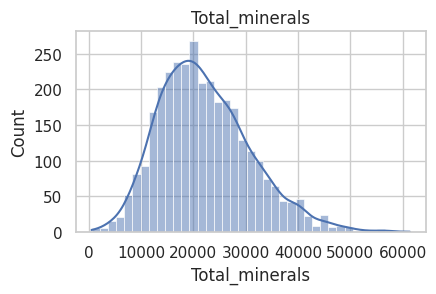

In [96]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

numerical_columns = imputed_data[['Total_minerals']].columns

for column in numerical_columns:
    plt.subplot(3, 3, numerical_columns.get_loc(column) + 1)
    sns.histplot(imputed_data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [97]:
pd.DataFrame(imputed_data.pH_category.value_counts())

,pH_category
Neutral,1745
Acidic,1040
Alkaline,490


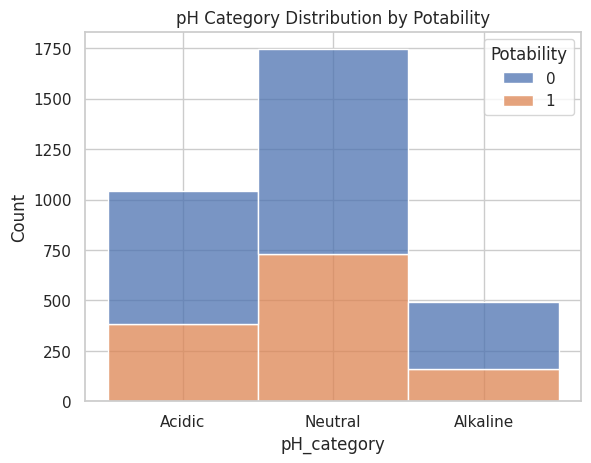

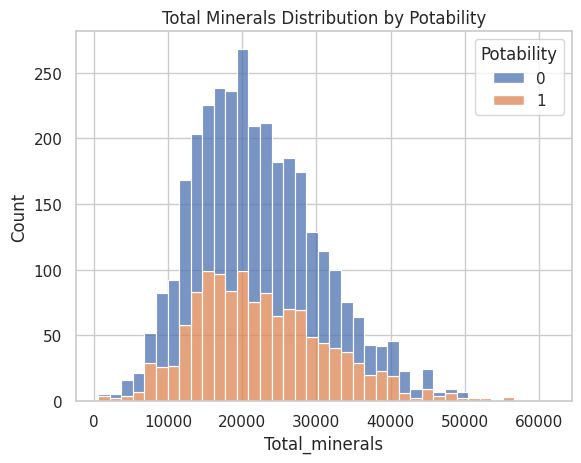

In [98]:
# Assuming you've loaded your dataset as 'data'
sns.histplot(data=imputed_data, x='pH_category', hue='Potability', multiple='stack')
plt.title('pH Category Distribution by Potability')
plt.show()

sns.histplot(data=imputed_data, x='Total_minerals', hue='Potability', multiple='stack')
plt.title('Total Minerals Distribution by Potability')
plt.show()

It is observed that the distribution of these two features for both potable and non-potable water samples looks similar, it indicates that the feature might not be a strong differentiator between the two classes. In other words, the feature might not have a significant influence on predicting water potability.

This could suggest that the feature might not carry enough discriminatory information to distinguish between potable and non-potable water samples. It's important to note that while a similar distribution doesn't necessarily mean the feature is irrelevant, it does raise the question of whether the feature contributes much to predicting the target variable.

In such cases, it is required to further analyze the statistical summary and consider performing hypothesis tests or calculating feature importance scores to quantitatively assess the impact of these features on potability prediction. If the additional analyses also indicate that the features are not strongly related to potability, you might consider excluding them from your modeling process.

However, the absence of a clear distinction in the distribution doesn't necessarily mean the features have no value. It's a part of the exploratory process to assess their potential contribution to your predictive models.

In [99]:
# Calculate correlations between the engineered features and Potability
correlation_matrix = imputed_data[['Total_minerals']].corrwith(imputed_data['Potability'])

# Display the correlation coefficients
print(correlation_matrix)

Total_minerals    0.033697
dtype: float64


In [100]:
potable_data = imputed_data[imputed_data['Potability'] == 1]['Total_minerals']
non_potable_data = imputed_data[imputed_data['Potability'] == 0]['Total_minerals']

t_statistic, p_value = stats.ttest_ind(potable_data, non_potable_data)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.9292069903552969
P-Value: 0.05379149767327082


In the context of hypothesis testing, the null hypothesis (often denoted as "H0") is a statement that suggests there is no effect or relationship between variables. It's a default assumption to test against by collecting and analyzing data.

In this case, when performing a t-test or Mann-Whitney U test to compare the distributions of the "Total_minerals" feature between potable and non-potable water samples, the null hypothesis might be something like:

"Total_minerals has no significant impact on water potability."

In other words, if the null hypothesis is true, it means that the "Total_minerals" feature doesn't have a noticeable difference between potable and non-potable water samples. The p-value obtained from the test gives an indication of how likely the observed data is under the assumption of the null hypothesis. If the p-value is low (typically below a significance level like 0.05), it might reject the null hypothesis in favor of an alternative hypothesis that suggests there is a significant difference between the groups. If the p-value is high, it might not have enough evidence to reject the null hypothesis, indicating that the observed difference could potentially be due to chance.

So in this case, a p-value of 0.054, which is greater than 0.05, means that there isn't strong enough evidence to reject the null hypothesis. In other words, there isn't enough statistical evidence to conclude that the "Total_minerals" feature significantly impacts water potability.

In [101]:
potable_data = imputed_data[imputed_data['Potability'] == 1]['Total_minerals']
non_potable_data = imputed_data[imputed_data['Potability'] == 0]['Total_minerals']

t_statistic, p_value = stats.ttest_ind(potable_data, non_potable_data)
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

T-Statistic: 1.9292069903552969
P-Value: 0.05379149767327082


If the data is not normally distributed, the Mann-Whitney U test can be used. This is a non-parametric test that assesses whether the distributions of two groups are significantly different. However, as far as in this dataset the features are normally distributed, it'd be better not to use this test.

# **Predictive Modeling**

First let's run the XGboost classifier after removing rows with missing values

## **Removing Observations with Missing Data**

In [102]:
print(f'Before dropping missing values, we have {data.shape[0]} instances')

data_dropped = data.dropna()
print(f'After dropping missing values, we have {data_dropped.shape[0]} instances')

# to see how mnay instances we have lost
print(f'We have lost {data.shape[0]-data_dropped.shape[0]} instances, which means % {round((data.shape[0]-data_dropped.shape[0])/ (float(data.shape[0])),2)*100} data we have lost')

Before dropping missing values, we have 3276 instances
After dropping missing values, we have 2011 instances
We have lost 1265 instances, which means % 39.0 data we have lost


In [103]:
data_dropped.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

**We don't have any missing values and have lost %39 percent of our data.**


**Let's move on to modeling and prediction.**

In [104]:
X = data_dropped.drop('Potability', axis=1)
y = data_dropped['Potability']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
print(f'Size of the X_train: {X_train.shape[0]}')
model = XGBClassifier(eval_metric='logloss')
model.fit(X_train, y_train)
predictions = model.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print (f'Accuracy:: {round(accuracy * 100.0,3)}')

Size of the X_train: 1407
Accuracy:: 65.728


**Now let's work with imputed data**

Split the Dataset:

---



---



Split the dataset into training and testing sets. The training set will be used to train the models, and the testing set will be used to evaluate their performance.

Before that as far as the data is imbalanced:

In [105]:
imputed_data["Potability"].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

It'd be better to use Stratified Sampling.

When splitting data into training and testing sets, using stratified sampling ensures that the class distribution in the training and testing sets is similar to the original class distribution. Scikit-learn's train_test_split has a stratify parameter that can be set to your target variable.

In [106]:
#creating feature and target matrices

X = imputed_data.drop('Potability', axis=1)  # Features
y = imputed_data['Potability']  # Target

In [107]:
X.head()

,ph,pH_category,Hardness,Solids,Total_minerals,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.283643,Neutral,204.890455,20791.318981,20996.209436,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,Acidic,129.422921,18630.057858,18759.480778,6.635246,342.957164,592.885359,15.180013,56.329076,4.500656
2,8.099124,Neutral,224.236259,19909.541732,20133.777992,9.275884,315.815403,418.606213,16.868637,66.420093,3.055934
3,8.316766,Neutral,214.373394,22018.417441,22232.790835,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,Alkaline,181.101509,17978.986339,18160.087848,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


As far as 'pH_category' and 'Total_minerals' features are created based on other features there for there is high correlation. This will help avoid multicollinearity and potential issues during model training.

In [108]:
X = X.drop(['pH_category','Total_minerals'], axis = 1)

In [109]:
# Assuming your features are in X and target is in y


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [110]:
y_train.value_counts()

0    1798
1    1150
Name: Potability, dtype: int64

In [111]:
y_test.value_counts()

0    200
1    128
Name: Potability, dtype: int64

as you can see, the ratio of potable to not potable water is same in both sets and same as the whole dataset(arount 1.56)

In [112]:
# Choose a machine learning algorithm (Random Forest)
model = RandomForestClassifier()

# Perform k-fold cross-validation (let's use k=5)
k = 5
scores = cross_val_score(model, X_train, y_train, cv=k, scoring='accuracy')

# Print the accuracy scores for each fold
print("Cross-Validation Scores:", scores)

# Calculate the mean and standard deviation of accuracy
mean_accuracy = scores.mean()
std_accuracy = scores.std()

print("Mean Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)


Cross-Validation Scores: [0.66779661 0.69322034 0.65254237 0.68760611 0.68081494]
Mean Accuracy: 0.6763960749330955
Standard Deviation of Accuracy: 0.014636919501430446


The mean accuracy of approximately 0.664 indicates that, on average, Random Forest model's predictions were correct around 66.4% of the time. The standard deviation of accuracy (0.0117) gives an idea of the variability in accuracy across different folds of the cross-validation process.

## **Fine-tuning model**

###**Hyper parameter tuning**

In [113]:
class HyperparameterTuner:
    def __init__(self, model, param_space):
        self.model = model
        self.param_space = param_space

    def grid_search(self, X, y):
        grid_search = GridSearchCV(self.model, self.param_space, cv=5)
        grid_search.fit(X, y)
        return grid_search.best_estimator_

    def random_search(self, X, y):
        random_search = RandomizedSearchCV(self.model, self.param_space, n_iter=50, cv=5)
        random_search.fit(X, y)
        return random_search.best_estimator_

    def bayesian_optimization(self, X, y):
        params = {
            'n_estimators': (10, 200),
            'max_depth': (1, 32),
            'min_samples_split': (2, 20),
            'min_samples_leaf': (1, 20),
            'max_features': (0.1, 1.0)
        }

        bayes_cv_tuner = BayesSearchCV(
            self.model,
            params,
            n_iter=5,
            cv=5,
            n_jobs=-1,
            verbose=1,
            refit=True
        )

        X_train_cv, X_val, y_train_cv, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        bayes_cv_tuner.fit(X_train_cv, y_train_cv)
        best_model = bayes_cv_tuner.best_estimator_

        y_pred = best_model.predict(X_val)
        accuracy = accuracy_score(y_val, y_pred)

        return best_model, accuracy

In [114]:
param_space = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    # Add other hyperparameters here
}
tuner = HyperparameterTuner(RandomForestClassifier(), param_space)
best_model = tuner.bayesian_optimization(X_train, y_train)
best_model

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


(RandomForestClassifier(max_depth=24, max_features=0.5180860206164674,
                        min_samples_leaf=5, min_samples_split=18,
                        n_estimators=125),
 0.6728813559322034)

In [115]:
model = RandomForestClassifier(max_depth=28, max_features=0.9473013842824254,
                        min_samples_leaf=4, min_samples_split=13,
                        n_estimators=140)  # Instantiate without hyperparameters
model.fit(X_train, y_train)       # Fit the model


RandomForestClassifier(max_depth=28, max_features=0.9473013842824254,
                       min_samples_leaf=4, min_samples_split=13,
                       n_estimators=140)

In [116]:
y_pred = model.predict(X_test)

In [117]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7073170731707317


In [118]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Precision: 0.7857142857142857
Recall: 0.34375
F1-Score: 0.4782608695652174


In [119]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[188  12]
 [ 84  44]]


In [120]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)


ROC AUC: 0.6418749999999999


In [121]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.94      0.80       200
           1       0.79      0.34      0.48       128

    accuracy                           0.71       328
   macro avg       0.74      0.64      0.64       328
weighted avg       0.73      0.71      0.67       328



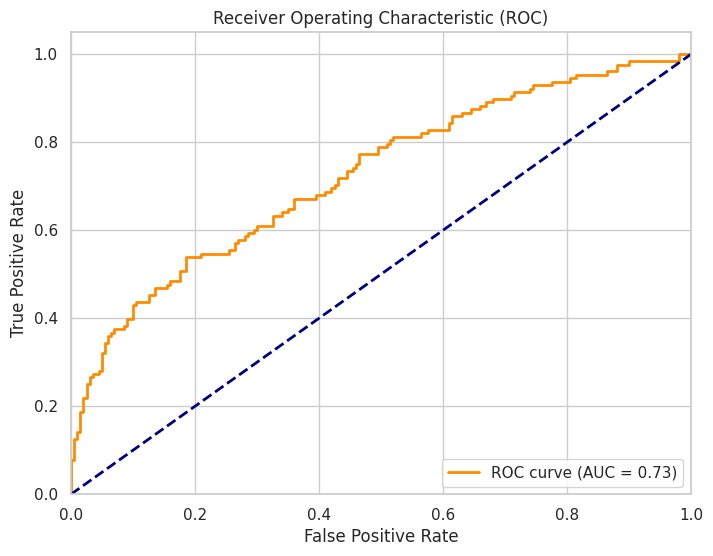

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
